In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.special import zetac
from mpmath import zeta 
from matplotlib.lines import Line2D


In [22]:
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]



<font size= "7"> 2D Growth </font>


(0.001, 100)

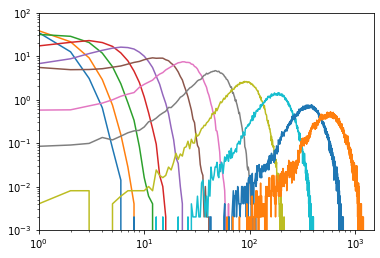

In [41]:
dens_list = ["0.028800", "0.050000", "0.100000", "0.200000", "0.400000", "0.800000", "1.600000", "3.200000", "6.400000", "12.800000", "25.600000", "40.000000"]
for i in dens_list:
    size, amount = np.loadtxt("2D_r3.000000_{}.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:]/500
    size = size[1:]
    plt.loglog(size, amount)
plt.xlim(1, 1500)    
plt.ylim(0.001, 100)

#de 40 hier bij overdensity moeten er af getrokken worden


<font size="7"> 3D Growth </font>

100000.0


Text(0.5, 1.0, 'Cluster size distribution: r=5, Density=0.8, Iterations=500')

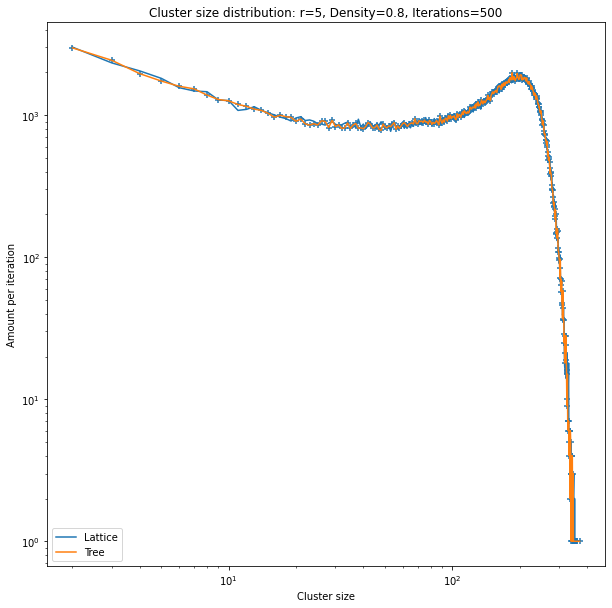

In [15]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D/3D_r5.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Lattice")


size, amount = np.loadtxt("Pref_growth/3D/3D_tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)
print(sum(amount*size)/500)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Tree")
plt.scatter(size, amount, marker='+')

plt.legend(loc="lower left")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.title("Cluster size distribution: r=5, Density=0.8, Iterations=500")




5.208514800400033
1.1668722232233881
------------------
4.420895838271569
1.2579896699351205
------------------
2.145190693665073
1.3051072925117342
------------------
1.6909484953396223
no tail


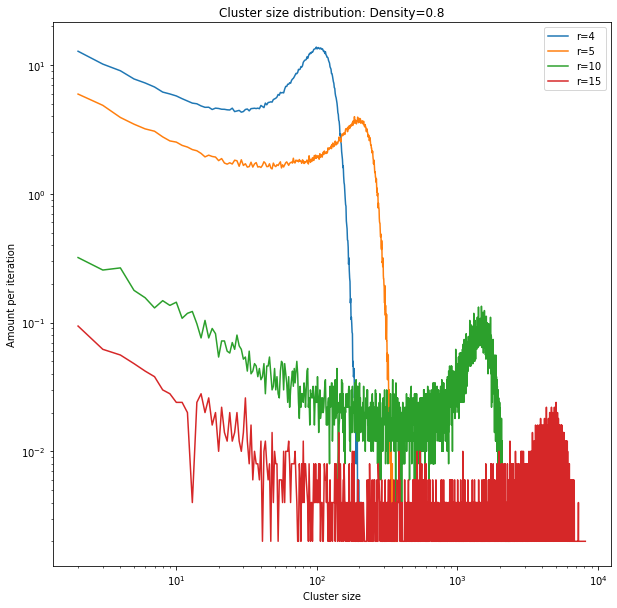

In [57]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_tree_r4.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=4")
print(alpha(amount, 1, 20))
print(alpha(amount, 100, 300))
print('------------------')

size, amount = np.loadtxt("Pref_growth/3D_tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=5")
print(alpha(amount, 1, 30))
print(alpha(amount, 250, 500))
print('------------------')


size, amount = np.loadtxt("Pref_growth/3D_tree_r10.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=10")
print(alpha(amount, 1, 50))
print(alpha(amount, 1080, 2000))
print('------------------')

size, amount = np.loadtxt("Pref_growth/3D_tree_r15.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=15")
print(alpha(amount, 1, 100))
print('no tail')


plt.title("Cluster size distribution: Density=0.8")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

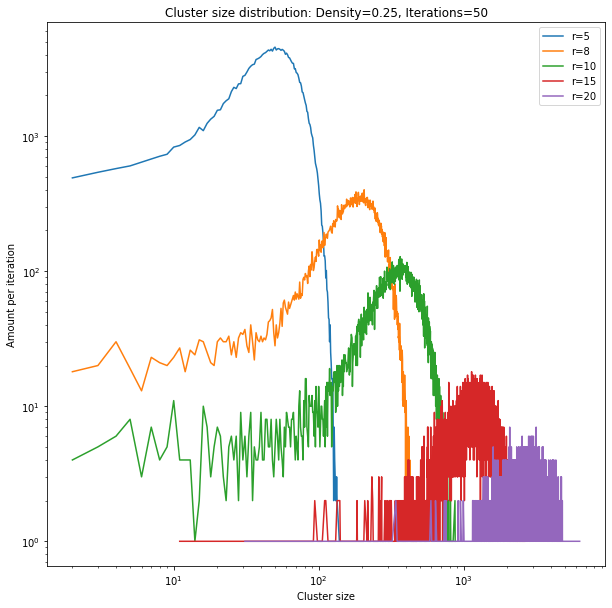

In [19]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=5")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r8.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=8")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=10")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r15.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=15")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r20.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=20")
plt.legend()
plt.title("Cluster size distribution: Density=0.25, Iterations=50")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

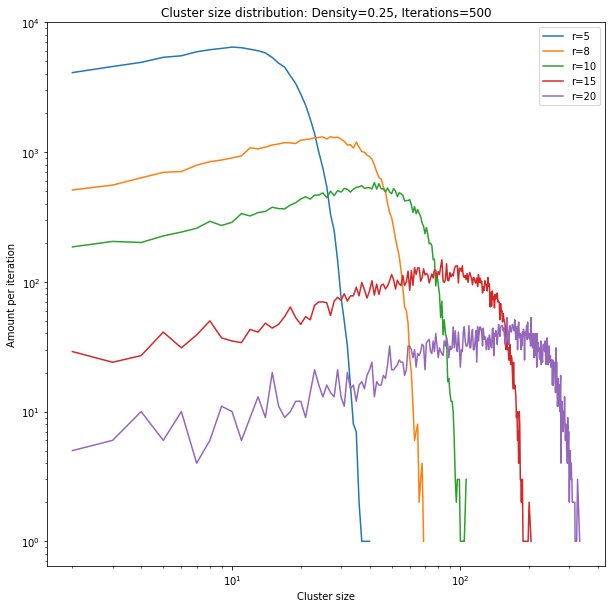

In [27]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/2D_c0.00_r5.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=5")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r8.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=8")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=10")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r15.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=15")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r20.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=20")
plt.legend()
plt.title("Cluster size distribution: Density=0.25, Iterations=500")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

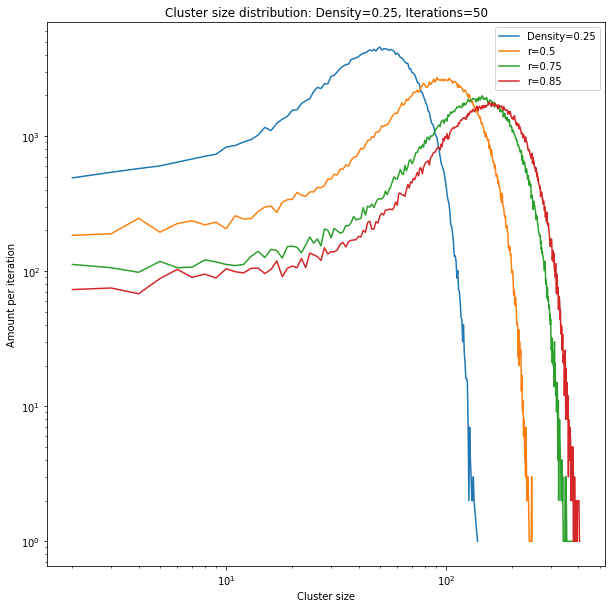

In [24]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.25")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.500000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=0.5")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.750000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=0.75")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.850000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="r=0.85")

plt.legend()
plt.title("Cluster size distribution: Density=0.25, Iterations=50")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

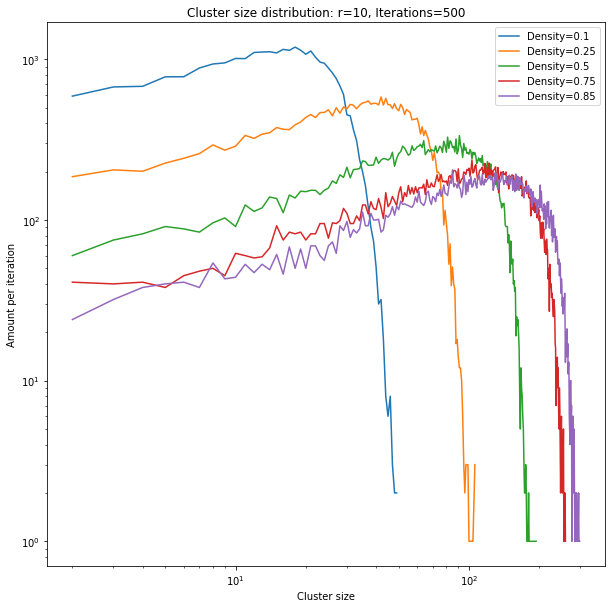

In [31]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.1")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.250000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.25")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.500000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.5")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.750000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.75")

size, amount = np.loadtxt("Pref_growth/2D_c0.00_r10.000000_0.850000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.85")

plt.legend()
plt.title("Cluster size distribution: r=10, Iterations=500")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

Text(0.5, 1.0, 'Cluster size distribution: r=5, Density=0.5, Iterations=50')

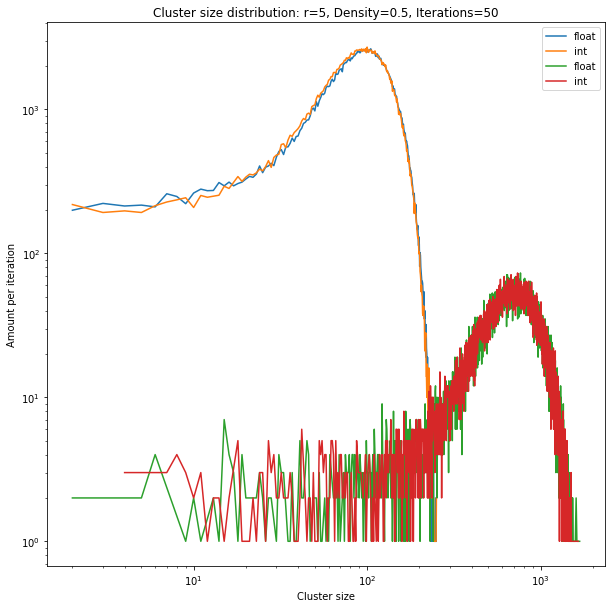

In [18]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.500000_float.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r5.000000_0.500000_int.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.500000_float.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.00_r10.000000_0.500000_int.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")

plt.legend()
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.title("Cluster size distribution: r=5, Density=0.5, Iterations=50")


<font size="7"> 3D Growth Keuze </font>

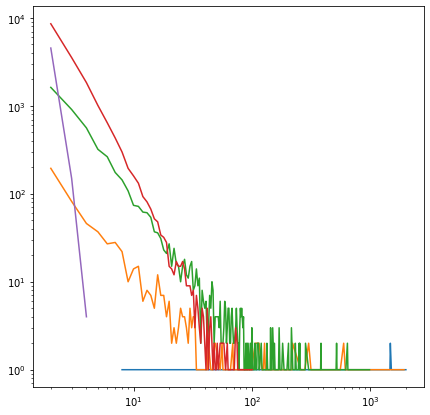

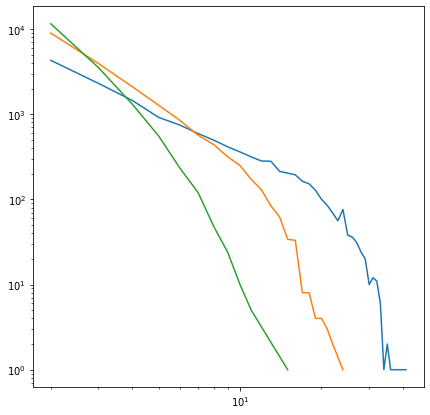

In [12]:
plt.figure(figsize=(7, 7))
size, amount = np.loadtxt("Pref_growth/3D_c0.0_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.01_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.10_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.5_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c1.0_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")


plt.figure(figsize=(7, 7))

size, amount = np.loadtxt("Pref_growth/3D_c0.25_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.50_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.75_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")



<font size="7"> 3D Attach Gravity </font>

/tmp/ipykernel_26168/223846771.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


4
6
9
10
11
9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Alpha')

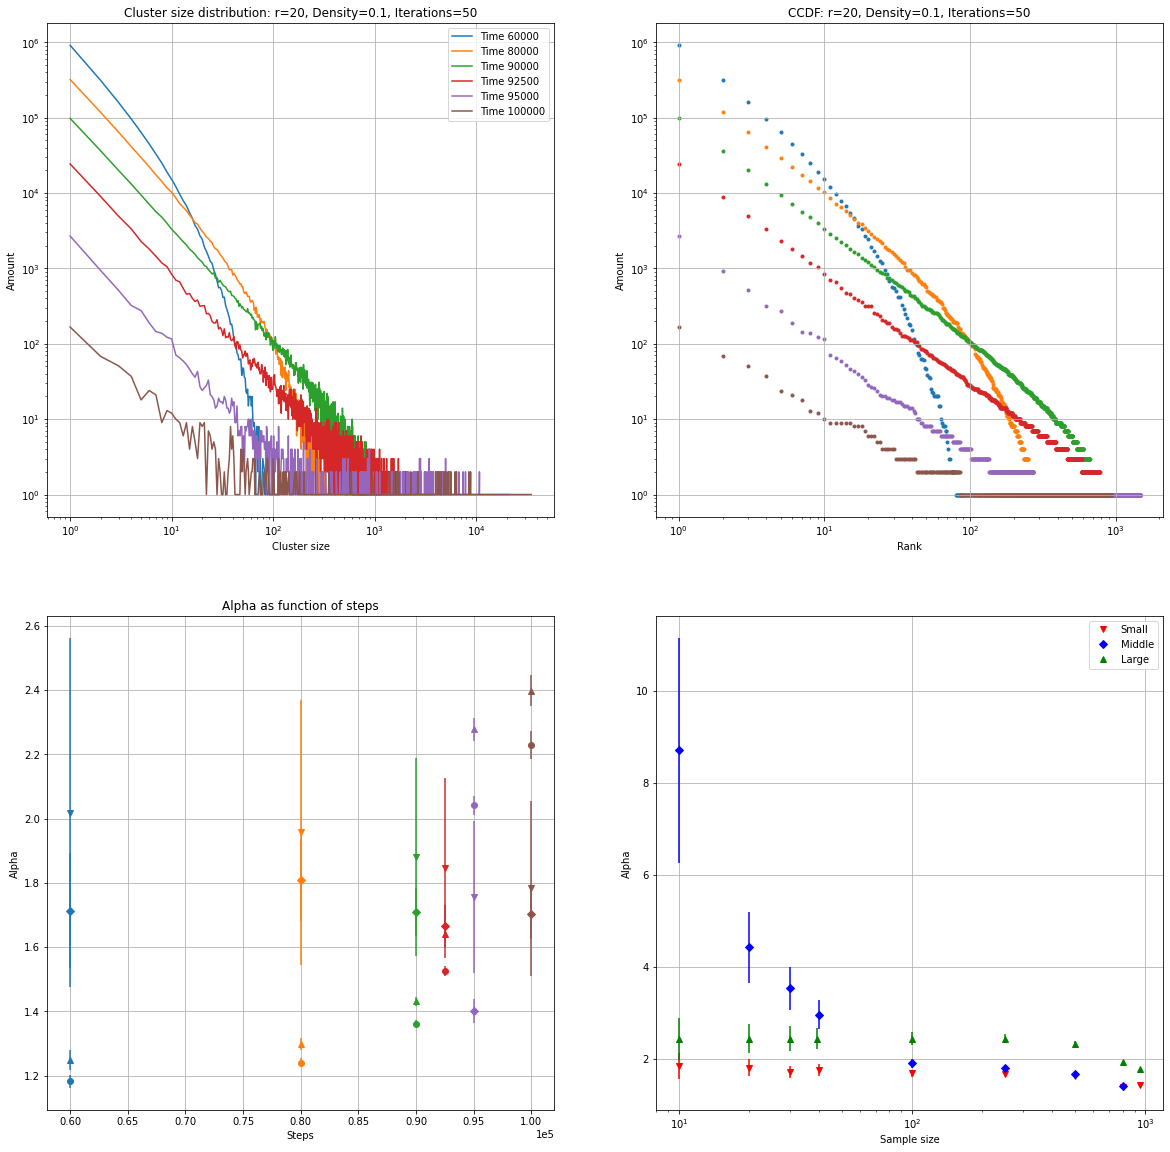

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
name = [60000, 80000, 90000, 92500, 95000, 100000]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

    
def calc_alpha(freq, size, xmin, xmax):
    alpha = 1 + len(freq[xmin:xmax]) / (np.sum(np.log(freq[xmin:xmax]/ (np.min(freq[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(freq[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
    
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,0].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,0].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,0].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_92500_0.100000_0.txt".format(name[i]), skiprows=2, unpack=True)
amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800, 950]


xmax_middle = np.array([55, 60, 65, 70, 110, 260, 510, 810])
xmin_middle = np.array([45, 40, 35, 30, 10, 10, 10, 10])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
xmin_end = [-11, -21, -31, -40, -101, -251, -501, -801, -951]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g') 

ax[1, 1].set_xscale('log')
ax[1,1].legend()
line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
ax[1,1].legend([line1, line2, line3], ['Small', 'Middle', 'Large'])

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=20, Density=0.1, Iterations=50")
ax[0,0].legend()

ax[1,0].set_xlabel("Steps")
ax[1,0].set_ylabel("Alpha")
ax[1,0].set_title("Alpha as function of steps")

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")
ax[0,1].set_title("CCDF: r=20, Density=0.1, Iterations=50")

ax[1,1].set_xlabel("Sample size")
ax[1,1].set_ylabel("Alpha")



/tmp/ipykernel_7519/432767143.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


4
6
9


Calculating best minimal value for power law fit


25.962716993424927 0.001015634538914543


Assuming nested distributions


-0.8089177710440913 0.2033938546313474
-0.1150533963689333 0.810747757190743
-0.11024037358637528 0.8119906700401063
10


Calculating best minimal value for power law fit


11
9


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


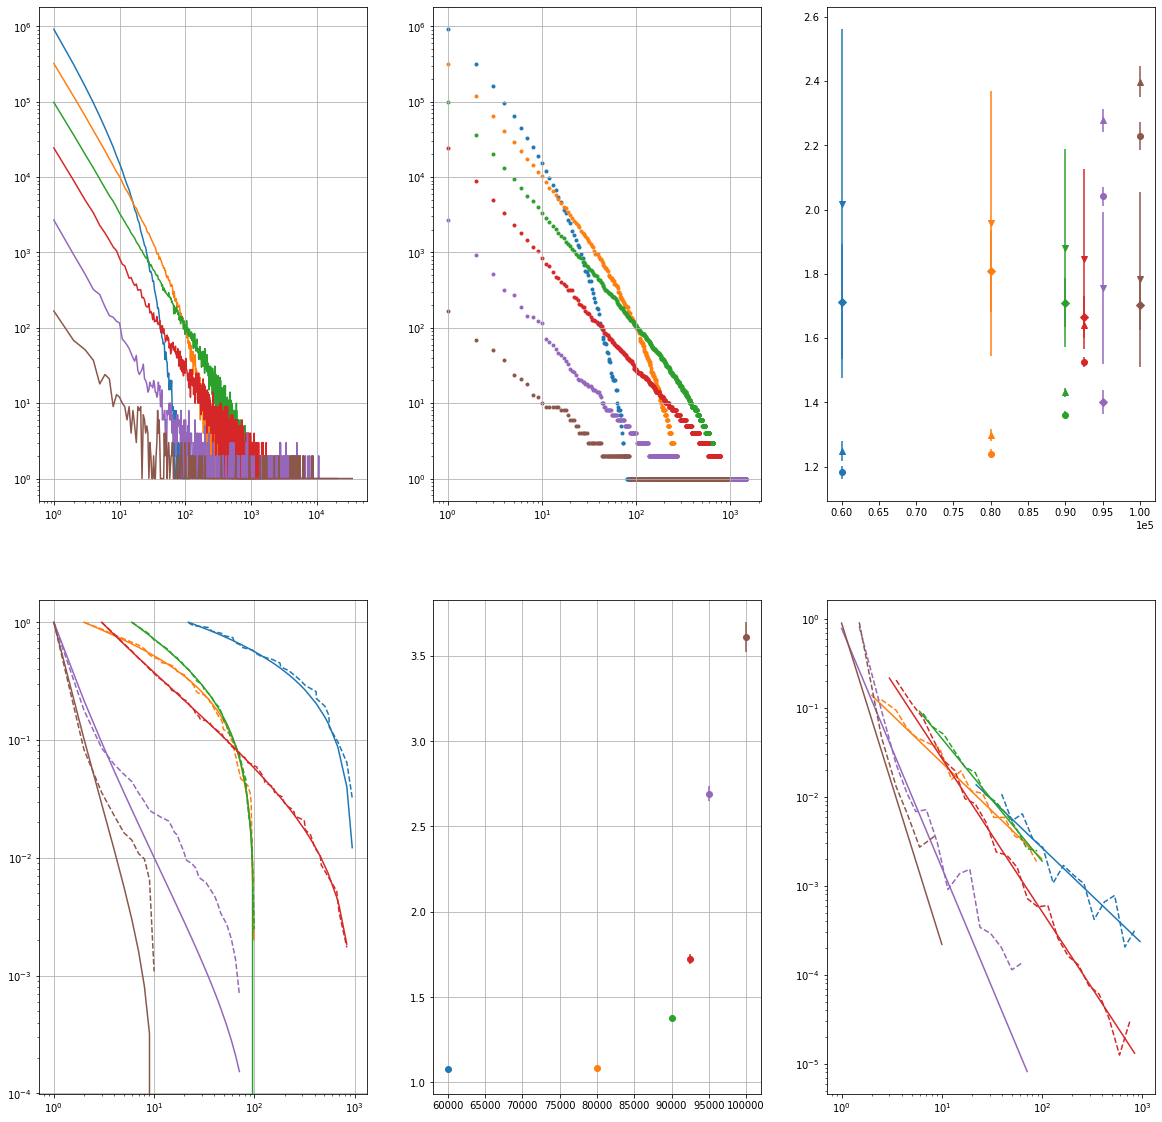

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
name = [60000, 80000, 90000, 92500, 95000, 100000]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

    
def calc_alpha(freq, size, xmin, xmax):
    alpha = 1 + len(freq[xmin:xmax]) / (np.sum(np.log(freq[xmin:xmax]/ (np.min(freq[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(freq[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
    
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

xmin = [0]*len(name)
xmax = [10**3, 10**2, 10**2, 10**3, 10**2, 10**1]


cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[0,2].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[0,2].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[0,2].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[0,2].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[0,2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    result = powerlaw.Fit(amount, discrete=True, xmin=xmin[i], xmax=xmax[i])
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    
    result.plot_pdf(ax=ax[1, 2], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_pdf(ax=ax[1, 2],  label="Time {}".format(name[i]), c=cmap(i))
    
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    if i == 2:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)


Calculating best minimal value for power law fit
/tmp/ipykernel_5378/2821568263.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


3
4
5
7


Calculating best minimal value for power law fit


9


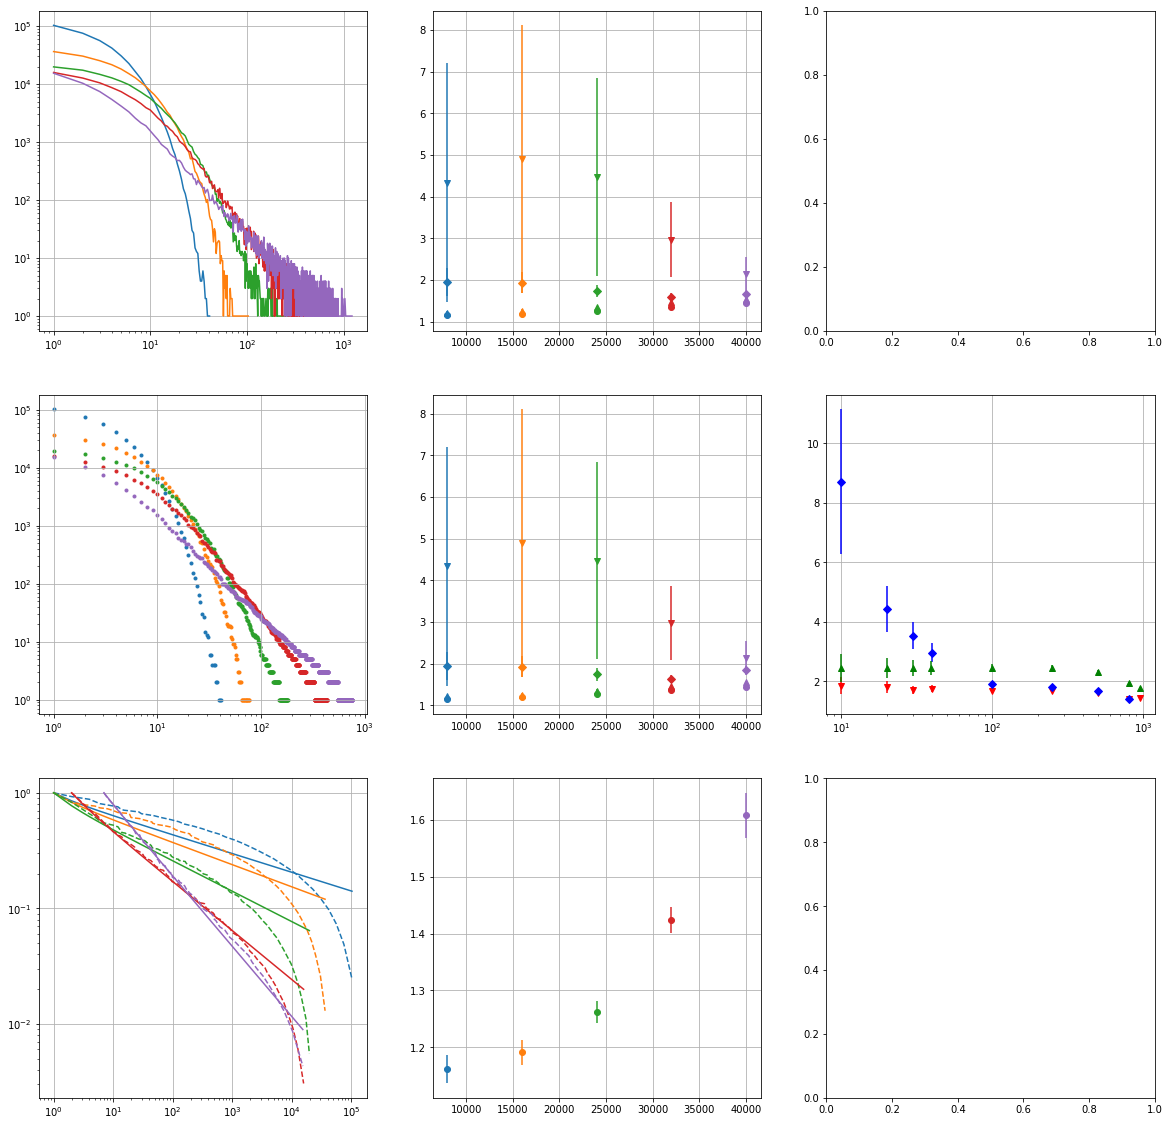

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
name = [8000, 16000, 24000, 32000, 40000]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

    
def calc_alpha(freq, size, xmin, xmax):
    alpha = 1 + len(freq[xmin:xmax]) / (np.sum(np.log(freq[xmin:xmax]/ (np.min(freq[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(freq[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
    
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/True/r50_2D_0.3/r50_2D_100_{}_0.300000_1.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[2, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[2, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))

    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[0,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[0,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[0,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))

    out1 = calc_alpha(ccdf, size, lower_lim, upper_lim)
    out12 = calc_alpha(ccdf, size, upper_lim, lower_lim2)
    out13 = calc_alpha(ccdf, size, lower_lim2, upper_lim2)
    out14 = calc_alpha(ccdf, size, 0, -1)


    ax[1,1].errorbar(name[i], out1[0], yerr=out1[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out12[0], yerr=out12[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out13[0], yerr=out13[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out14[0], yerr=out14[1], fmt='o', c=cmap(i))

size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_92500_0.100000_0.txt".format(name[i]), skiprows=2, unpack=True)
amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800, 950]


xmax_middle = np.array([55, 60, 65, 70, 110, 260, 510, 810])
xmin_middle = np.array([45, 40, 35, 30, 10, 10, 10, 10])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
xmin_end = [-11, -21, -31, -40, -101, -251, -501, -801, -951]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha(amount, size, i, j)
    ax[1, 2].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha(amount, size, i, j)
    ax[1, 2].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha(amount, size, i, j)
    ax[1, 2].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g')

ax[1, 2].set_xscale('log')
ax[1, 2].grid()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


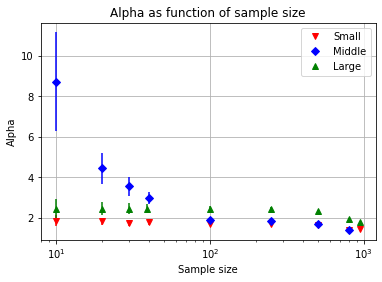

In [23]:

line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
plt.legend([line1, line2, line3], ['Small', 'Middle', 'Large'])

plt.xlabel("Sample size")
plt.ylabel("Alpha")
plt.title("Alpha as function of sample size")

size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_92500_0.100000_0.txt", skiprows=2, unpack=True)
amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800, 950]


xmax_middle = np.array([55, 60, 65, 70, 110, 260, 510, 810])
xmin_middle = np.array([45, 40, 35, 30, 10, 10, 10, 10])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
xmin_end = [-11, -21, -31, -40, -101, -251, -501, -801, -951]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha(amount, size, i, j)
    plt.errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha(amount, size, i, j)
    plt.errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha(amount, size, i, j)
    plt.errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g') 

plt.xscale('log')
plt.legend()
line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
plt.legend([line1, line2, line3], ['Small', 'Middle', 'Large'])

plt.xlabel("Sample size")
plt.ylabel("Alpha")
plt.title("Alpha as function of sample size")
plt.grid()

In [1]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20), dpi=800)
name = [100000, 150000, 200000, 250000, 300000, 375000]


def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (xmin + 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_{}_0.300000_0.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(size, size, 0, -1)
    ax[1,0].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,0].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,0].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_250000_0.300000_0.txt", skiprows=2, unpack=True)

amount = np.sort(amount)[::-1]
xmin_begin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
xmax_begin = [10, 20, 30, 40, 100, 250, 500, 800, 950]


xmax_middle = np.array([505, 515, 510, 550, 625, 750, 900, 975])
xmin_middle = np.array([495, 485, 490, 450, 375, 250, 100, 25])

xmax_end = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
xmin_end = [-11, -21, -31, -40, -101, -251, -501, -801, -951]

for i, j in zip(xmin_begin, xmax_begin):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='v', c='r')

for i, j in zip(xmin_middle, xmax_middle):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='D', c='b')


for i, j in zip(xmin_end, xmax_end):
    out = calc_alpha(amount, size, i, j)
    ax[1, 1].errorbar(len(amount[i:j]), out[0], yerr=out[1], fmt='^', c='g') 

ax[1, 1].set_xscale('log')
ax[1,1].legend()
line1 = Line2D([0], [0], marker='v', color='r', linestyle='None')
line2 = Line2D([0], [0], marker='D', color='b', linestyle='None')
line3 = Line2D([0], [0], marker='^', color='g', linestyle='None')

# Create the legend
ax[1,1].legend([line1, line2, line3], ['Small', 'Middle', 'Large'])

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=20, Density=0.3, Iterations=50")
ax[0,0].legend()

ax[1,0].set_xlabel("Steps")
ax[1,0].set_ylabel("Alpha")

ax[1,0].set_title("Alpha as function of steps")

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")
ax[0,1].set_title("CCDF: r=20, Density=0.3, Iterations=50")
ax[0,0].set_xlim(1, 1000)

ax[1,1].set_xlabel("Sample size")
ax[1,1].set_ylabel("Alpha")



NameError: name 'plt' is not defined

[1.565193502253986, mpf('0.018180567092428393')]
[1.565193502253986, mpf('0.018180567092428393')]


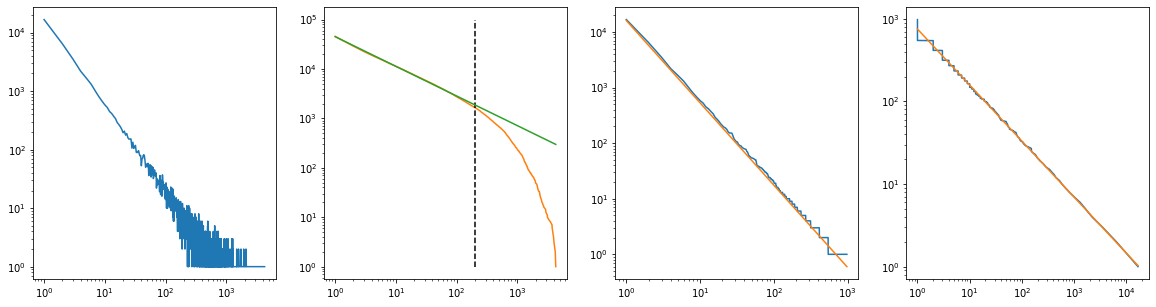

In [134]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_250000_0.300000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax[0].loglog(size, amount, label="int")
print(calc_alpha(amount, size, 1, -1))

ccdf = np.sort(amount)[::-1]
ranks = np.arange(1, len(ccdf)+1)
print(calc_alpha(ccdf, ranks, 1, -1))

ax[2].plot(ranks, ccdf)
ax[3].plot(ccdf, ranks)

def power_law(x, a, b):
    return a * np.power(x, -b)
ax[2].plot(ranks, power_law(ranks, 1.6*  10**4, 1.48))
ax[3].plot(ccdf, power_law(ccdf, 0.75* 10**3, 0.678))

ax[1].set_xscale('log')
ax[1].set_yscale('log')

ccdf2 = 1 - np.cumsum(amount)
ax[1].plot(ccdf2, ranks)    
ax[3].set_xscale('log')
ax[3].set_yscale('log')
lijst2 = []

amount = amount[:10**3]
for i in range(len(size)):
    lijst2.append(np.sum(amount[i:]))

    
rank = np.arange(1, len(amount)+1)
ax[1].plot(size, lijst2)
ax[1].vlines(200, 1, 100000, colors='k', linestyles='dashed')
ax[1].plot(size, power_law(size, 4.5* 10**4, 0.6))

ax[2].set_xscale('log')
ax[2].set_yscale('log')






[1.2148555699103636, 0.04929124824716385]
[1.268115405060057, 0.02979060056222855]
[1.321421446672271, 0.022784962243256195]
[1.1996454197990374, 0.04842112667660062]
[1.365593209135036, 0.03170095164313063]
[1.4167697689099406, 0.029544025599592433]
[1.215560344429607, 0.022849350810882425]
[1.2834624513343873, 0.020094120407653723]
[1.5114610085163425, 0.036256509603184356]


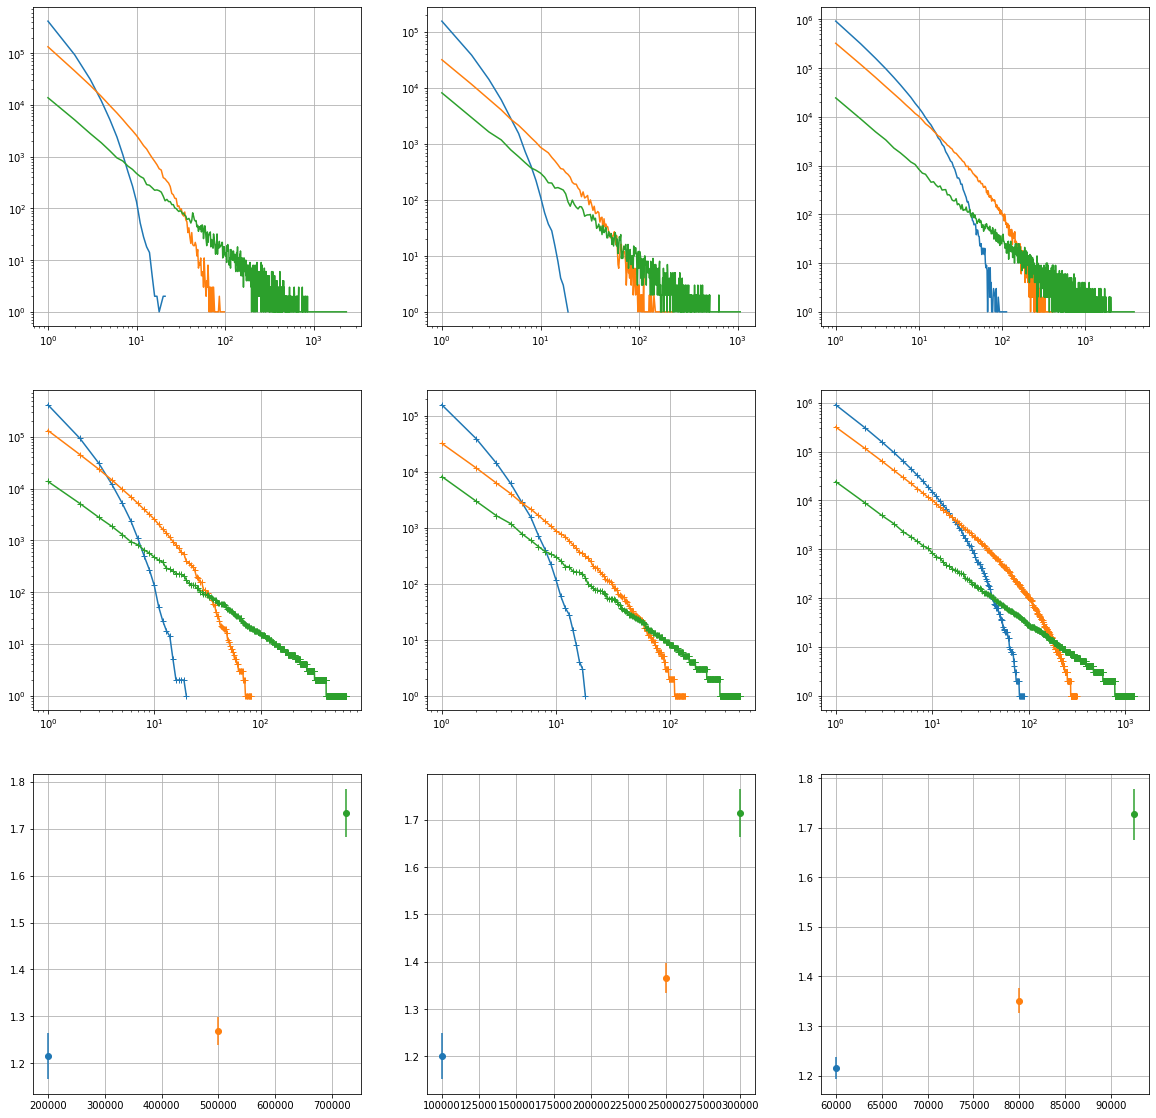

In [4]:

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')


ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 2].grid()
ax[2, 0].grid()
ax[2, 1].grid()
ax[2, 2].grid()

cmap = plt.get_cmap('tab10')    

def plot_rank_frequency(amount, xmin, xmax, ax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax.plot(ranks, ccdf, marker='+')
    a, s = calc_alpha(ccdf, xmin, xmax)
    return [a, s]
    
def calc_alpha(amount, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/np.min(amount[xmin:xmax]))))
    sigma = (alpha - 1) / np.sqrt(len(amount[xmin:xmax]))
    return [alpha, sigma]

name = [200000, 500000, 725000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_200/r20_3D_200_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    print(alpha(amount, 1, 200))
    out2 = plot_rank_frequency(amount, 1, 200, ax[1, 0])
    ax[2,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))

name = [100000, 250000, 300000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_150/r20_3D_150_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 1].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    print(alpha(amount, 1, 200))
    out2 = plot_rank_frequency(amount, 1, 200, ax[1, 1])
    ax[2,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))


name = [60000, 80000, 92500]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 2].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    print(alpha(amount, 1, 200))
    out2 = plot_rank_frequency(amount, 1, 200, ax[1, 2])
    ax[2,2].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))



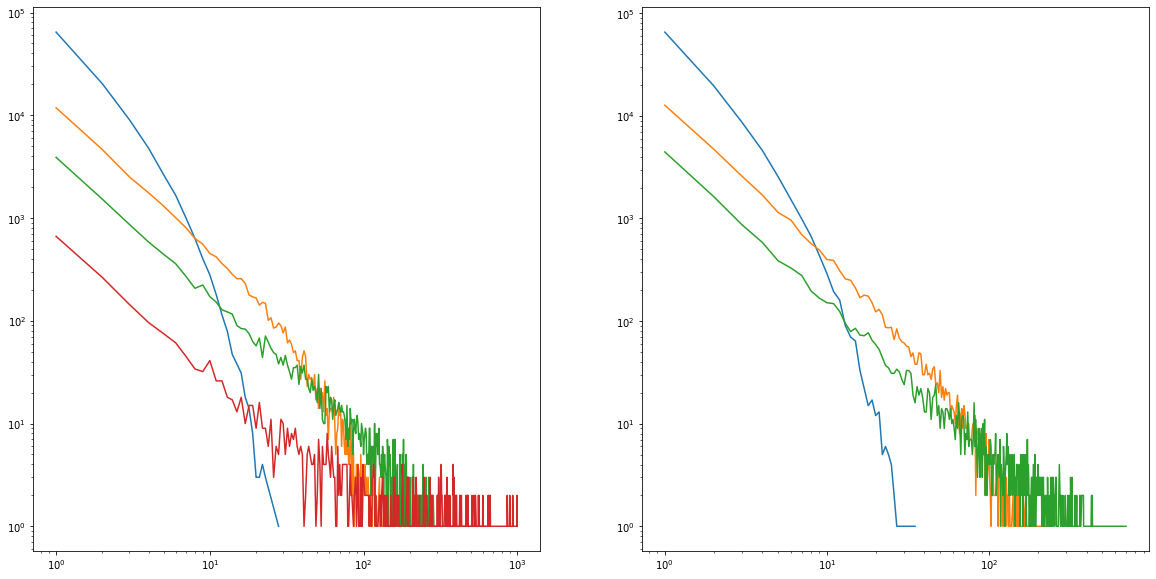

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
name = [427, 807, 902, 950]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/2D_r45/r45_2D_100_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0].loglog(size, amount, label="Time {}".format(name[i]))

name = [427, 807, 902]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/1 over r/r45_2D_100_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[1].loglog(size, amount, label="Time {}".format(name[i]))

<font size="7"> Pref Attach Unit </font>

/tmp/ipykernel_45305/3186204955.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_45305/3186204955.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


2
3
4
4
5
7
10


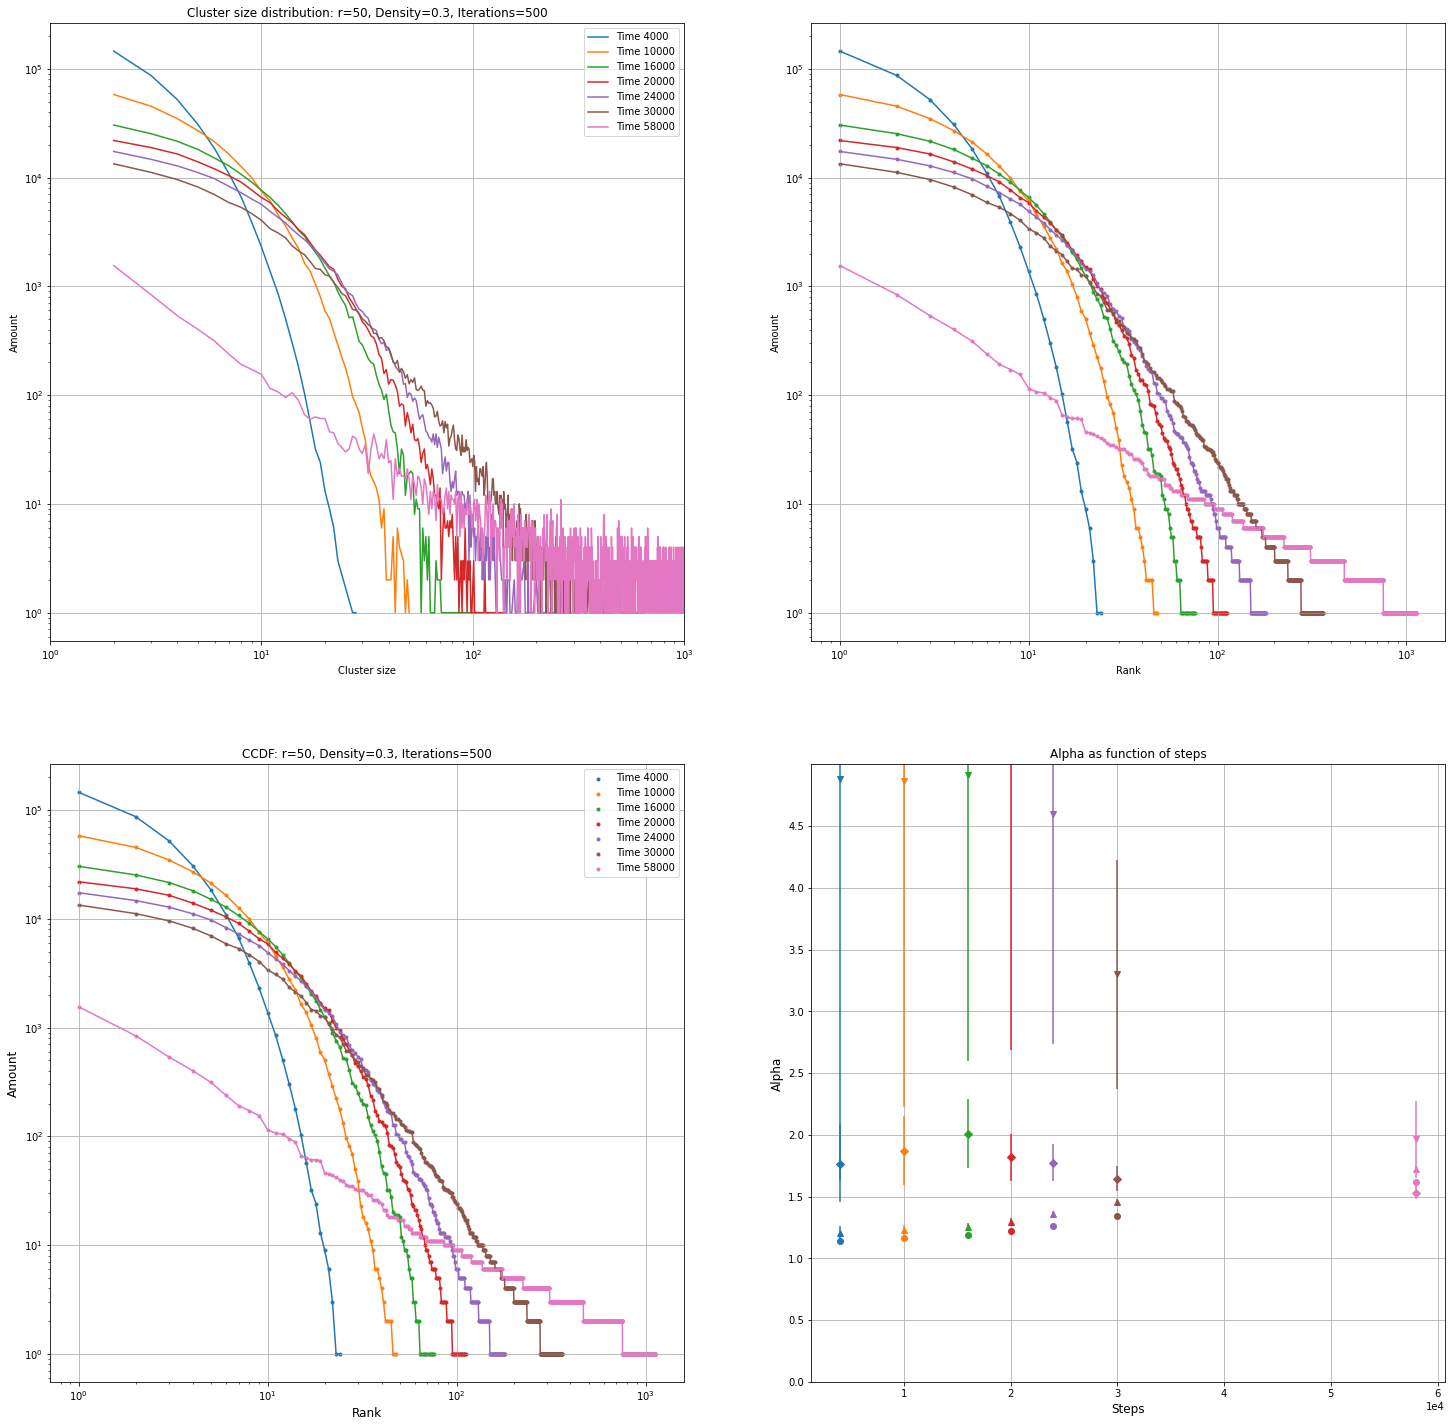

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [4000, 10000, 16000, 20000, 24000, 30000, 58000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/True/r50_2D_0.3/r50_2D_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



2
4
5
5
5
6


/tmp/ipykernel_5399/3461894757.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_5399/3461894757.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


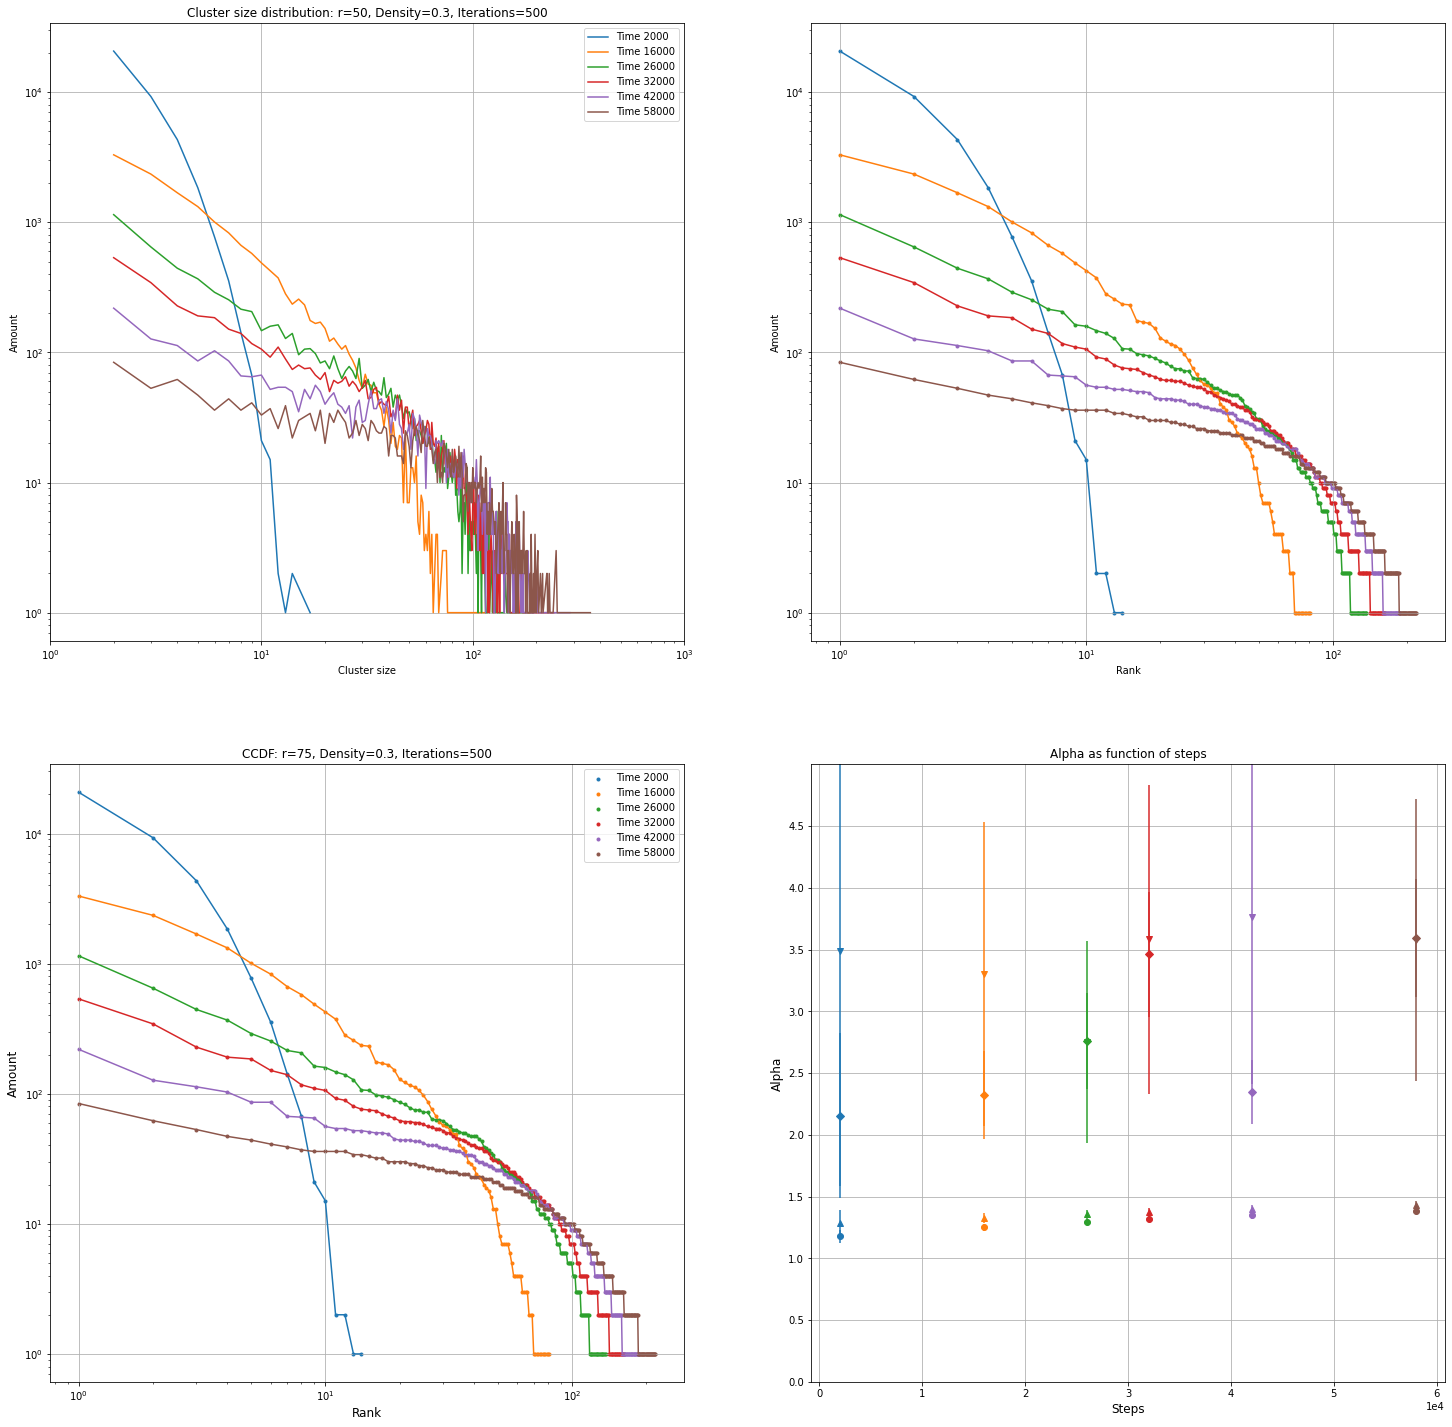

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [2000, 16000, 26000, 32000, 42000, 58000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/True/rsquared/r75_2D_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=75, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



<font size="7"> Frutsels </font>

100000.0
100000.0
100000.0


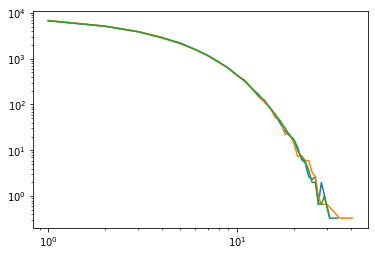

In [9]:
size, amount = np.loadtxt("Pref_attach/True/r6_3D_tree_100000_0.800000_1.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]/3
plt.loglog(size, amount, label="int")

size, amount = np.loadtxt("Pref_attach/R6_PA_0.800000_100000.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]/3
plt.loglog(size, amount, label="int")

size, amount = np.loadtxt("Pref_attach/r6_3D_tree_100000_0.800000_1.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]/3
plt.loglog(size, amount, label="int")


1000.0
1000.0
1000.0


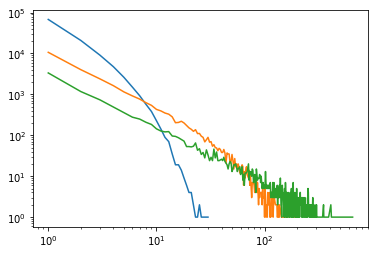

In [51]:

size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_405_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_810_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_900_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


1000.0
1000.0
1000.0
1000.0
1000.0
600.0


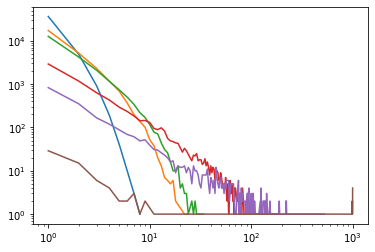

In [57]:
size, amount = np.loadtxt("Pref_attach/r99_2D_tree_100_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_400_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_500_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_800_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_900_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_950_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)


In [123]:
lijst = [1,2,3,4,5,6,7,8]
print(lijst[2:-1])

[3, 4, 5, 6, 7]
